<a href="https://colab.research.google.com/github/Shubhamd13/NLP/blob/main/3_1_Self_Attention_Student_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Utilities

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

np.random.seed(10)

In [ ]:
# Plot heatmap
def plot_heatmap(matrix, title, labels):
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, annot=True, cmap='viridis')
    plt.title(title)
    plt.show()

def PCA_plot(matrix, tokens):
  pca = PCA(n_components=2)
  reduced = pca.fit_transform(matrix)

  plt.scatter(*reduced.T)
  for i, word in enumerate(tokens):
      plt.text(reduced[i,0], reduced[i,1], word)
  plt.xlim((-3.5, 4))
  plt.ylim((-2.5, 2))
  plt.title("Self-Attention Output Vectors (2D Projection)")
  plt.grid(True)
  plt.show()


## Self Attention Process

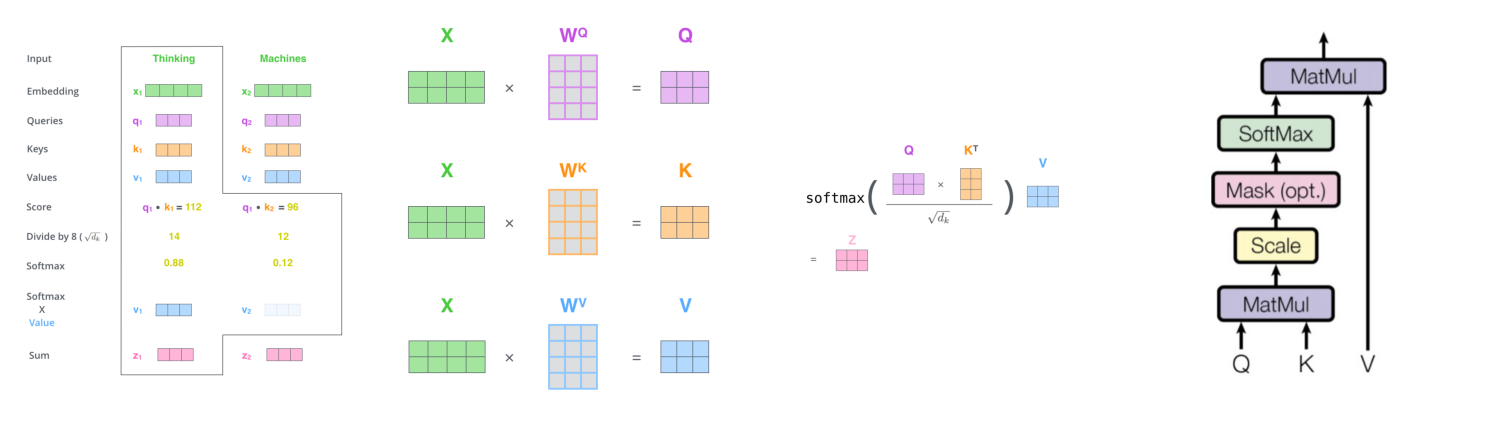

In [ ]:
from PIL import Image
import requests
from io import BytesIO

image_urls = [
    "https://jalammar.github.io/images/t/self-attention-output.png",
    "https://jalammar.github.io/images/t/self-attention-matrix-calculation.png",
    "https://jalammar.github.io/images/t/self-attention-matrix-calculation-2.png",
    "https://production-media.paperswithcode.com/methods/35184258-10f5-4cd0-8de3-bd9bc8f88dc3.png"
]
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for ax, url in zip(axes, image_urls):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

## Vocabulary

In [ ]:
sentence = "The animal ran away because it was scared"
vocab = sentence.split()
print(vocab)
vocab_size = len(vocab)
embed_dim = 4

['The', 'animal', 'ran', 'away', 'because', 'it', 'was', 'scared']


## Construct Input Embeddings Matrix

'''Q1. What is the shape of the input embedding matrix?'''

In [ ]:
# In this quiz, we are considering self attention calculation in the matrix form.
# The first step is to create a embedding matrix for all the words in the vocabulary.
# For simplicity, we will represent each word using random values in the embedding matrix.

A = vocab_size
B = embed_dim

input_embeddings = np.random.randn(A,B)
print(input_embeddings.shape)

(8, 4)


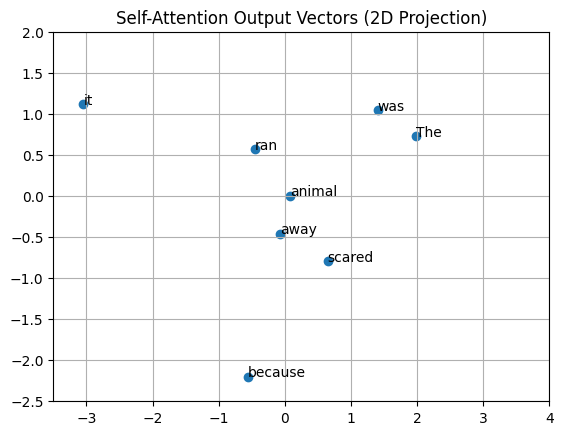

In [ ]:
# Before calculating self attention, we will observe the embedding of the tokens in the vocabulary.

PCA_plot(input_embeddings, vocab)

## Initialize Weight Matrices

'''Q2. What is the shape of the query weight matrix?'''

In [ ]:
# To calculate Query, Key and Value matrix, we need corresponding weight matrices. For simplicity, we will initialize them with random values.
# Think about the shape of the weight matrices.
# Since we have to do matrix multiplication later, the number of rows in the weight matrices should have to match the number of columns in the input embedding matrix.


####! add your code here
P =4
####

Q = embed_dim+1

W_Q = np.random.rand(P, Q)
W_K = np.random.rand(P, Q)
W_V = np.random.rand(P, Q)

print(W_Q.shape)

(4, 5)


## Compute Query, Key and Value matrix

'''Q3. Given token embeddings and a learned matrix W_V, what is the output of X @ W_V? (Here, X is the input embedding matrix)'''

In [ ]:
# Compute Q, K, V. Perform Matrix multiplication between input embeddings and weight matrices.

Q = input_embeddings @ W_Q
K = input_embeddings @ W_K
V = input_embeddings @ W_V

## Compute Attention Score

'''Q4. Which of the following operation is needed to calculate attention score?'''

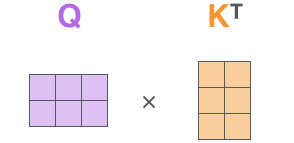

In [ ]:
# Attention score calculates similarity between the current token and all other tokens

####! add your code here
attention_scores = Q @ K.T
####

## Perform Scaling

'''Q5. Which of the following values is used to scale the attention scores?'''

In [ ]:
# Find the dimension of a key in the Key matrix and divide scores by the square root of the key dimension.
# So, dk = the number of columns in the Key Matrix (K).

####! add your code here
dk =K.shape[1]
####
print(dk)

scaled_attention_scores = attention_scores / np.sqrt(dk)

5


## Perform Softmax Operation

In [ ]:
# Softmax score determines how much each word will be expressed at a position. Softmax converts scaled attention scores into probabilities.

attention_weights = np.exp(scaled_attention_scores)
attention_weights /= np.sum(attention_weights, axis=1, keepdims=True)

'''Q6. After applying softmax, what is the attention score that 'animal' gives to 'it'?'''

'''Q7. What does a high attention weight from token A to token B indicate?'''

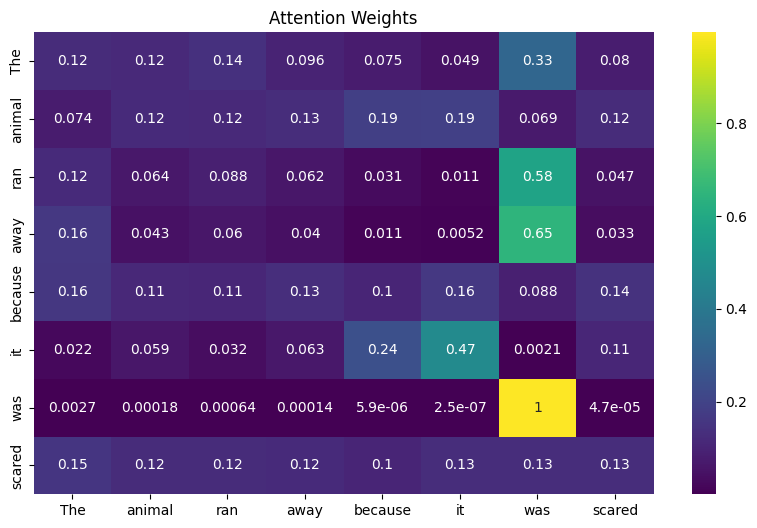

In [ ]:
# Plot attention weights
plot_heatmap(attention_weights, "Attention Weights", vocab)

In [ ]:
from_token = 'animal'
to_token = 'it'

from_idx = vocab.index(from_token)
to_idx = vocab.index(to_token)

score = attention_weights[from_idx, to_idx]
print(score)

0.18797226508452114


## Final Step of Self Attention Computation

'''Q8. What is the final step of self-attention computation?'''
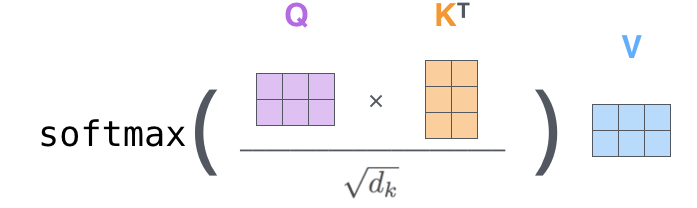

In [ ]:
# Perform matrix multiplication between attention weights achieved after softmax operation and Value matrix
# z = Attention weights matrix (multiplied by) Value matrix

####! add your code here
self_attention_output = attention_weights@V
####

'''Q9. What happens to word representations after applying self-attention?'''

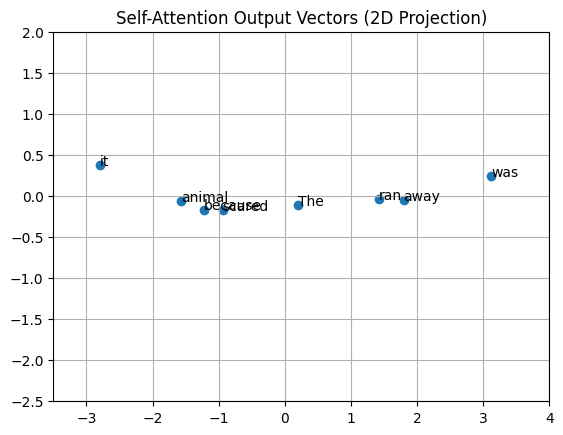

In [ ]:
# After calculating self attention, we will observe the embedding of the tokens in the vocabulary.

PCA_plot(self_attention_output, vocab)